### Stock predictor of google actions
First of all I will start but seeing the data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Download the dataset from kaggle

https://www.kaggle.com/datasets/adilshamim8/google-stocks-historical-data?resource=download

In [78]:
dataset = pd.read_csv("./data/Google_stock_data.csv")
dataset

,Date,Close,High,Low,Open,Volume
0,2004-08-19,2.484366,2.576470,2.375919,2.475947,897427216
1,2004-08-20,2.681699,2.700763,2.488327,2.500954,458857488
2,2004-08-23,2.708686,2.809705,2.700021,2.742112,366857939
3,2004-08-24,2.596526,2.763156,2.564338,2.754243,306396159
4,2004-08-25,2.624504,2.674023,2.572014,2.598754,184645512
...,...,...,...,...,...,...
5231,2025-06-04,169.186630,169.376405,167.593544,168.077962,18508700
5232,2025-06-05,169.606125,172.153066,169.146686,171.413949,25375400
5233,2025-06-06,174.709991,175.618903,172.093142,172.093142,22258100
5234,2025-06-09,177.630005,177.914993,175.660004,175.869995,18817600


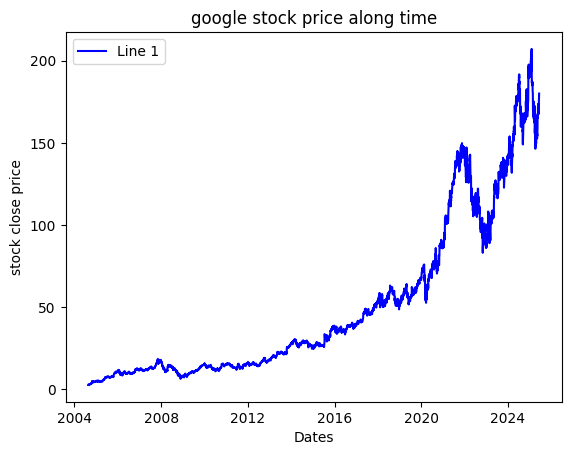

In [4]:
#Data for the line chart
%matplotlib inline

dates = pd.to_datetime(dataset.iloc[:, 0]) # X-axis values
price_stock = dataset.iloc[:, 1]  # Y-axis values

# Create the line chart
plt.plot(dates, price_stock, label='Line 1', color='blue')

# Add labels and title
plt.xlabel('Dates')
plt.ylabel('stock close price')
plt.title('google stock price along time')

# Add a legend
plt.legend()

# Show the chart
plt.show()


#### Taking into account what type of data we have we can try a lot of combinations for making predictions

In [5]:
#dataset = dataset.iloc[:, 0:2]
dataset.head()

,Date,Close
0,2004-08-19,2.484366
1,2004-08-20,2.681699
2,2004-08-23,2.708686
3,2004-08-24,2.596526
4,2004-08-25,2.624504


### Preparing the data

* firstly make the correlative sequences 
* secondly it takes into account that all are the same size
* if is shorter is filled with zeros
* if is bigger is deleted the extra part

#### the seq_len parameter is the size of the window that it will be passed to the network to study 
such as these situation is stocks and the info is daily the window taken is one month

#### If we want to filiter the paramenterst that enter to the network it have to be done before executing the preprare_data function 

In [79]:
seq_len = 30

In [204]:
def prepare_data(dataset, seq_len):
    X_train = []
    y_train = []

    
    for i in range(len(dataset)):
    #for i in range(30):
        column_operated = []
        if i < seq_len: # fills with zeros
            for c in range(len(dataset.columns) - 1 ):
                column_operated.append(
                        np.concatenate(([0] * (seq_len - i - 1), np.array(dataset.iloc[:(i+1), (c+1)])))
                )
                
            X_train.append(np.array(column_operated)) 

        else: # this eliminates the extre values
            for c in range(len(dataset.columns) -1):
                column_operated.append(
                    dataset.iloc[i-30:i, (c+1)].values
                )
            
            X_train.append(column_operated)

        y_train.append(dataset.iloc[i, 1:])

    #return X_train, y_train
    return np.array(X_train), np.array(y_train)
        
    

In [45]:
def prepare_data(dataset, seq_len):
    X_train = []
    y_train = []
    
    for i in range(len(dataset)-seq_len):
        
        X_train.append(dataset.iloc[i:(i+seq_len), 1:])
        y_train.append(dataset.iloc[i, 1:])

    return np.array(X_train), np.array(y_train)
        
    

In [205]:
X_train, y_train = prepare_data(dataset, seq_len)